# 1. Introduction

This case study will use the Pima Indian diabetes dataset from Kaggle and KNN to identify the optimal parameters for a machine learning algorithm.

# 2. Sourcing and Loading
## 2a. Load the necessary packages

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

## 2b. Load the diabetes data

In [137]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2c. Preliminary data analysis

In [138]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [139]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 3. Data Wrangling

Currently, the missing values in the dataset are represented as zeros. I will replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with NaN.

In [140]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
diabetes_data.Glucose.isnull().sum()

5

# 4. Exploratory Data Analysis

## 4a. Histograms of each column

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


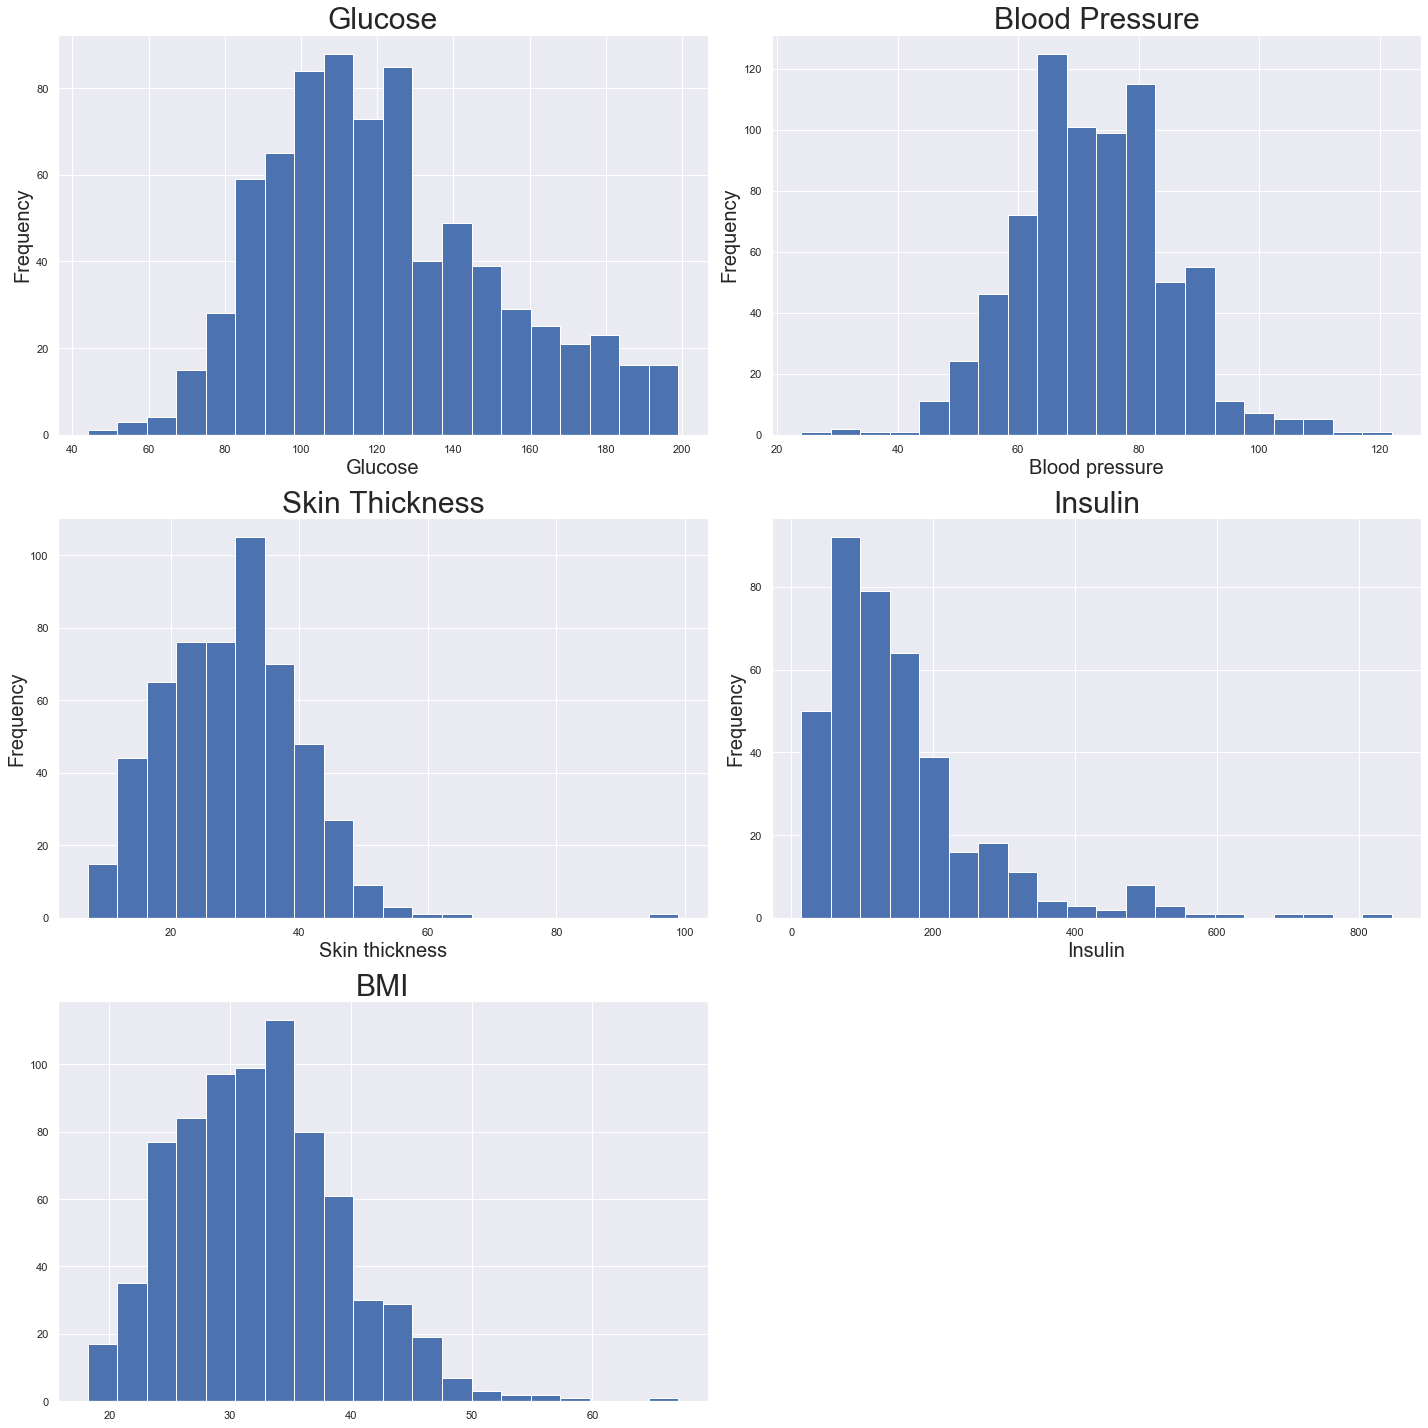

In [141]:
fig, axes = plt.subplots(figsize=(20,20))

_ = plt.subplot(3,2,1)
_ = plt.hist(diabetes_data['Glucose'], bins=20)
_ = plt.title('Glucose', fontdict = {'fontsize' : 30})
_ = plt.xlabel('Glucose', fontdict = {'fontsize' : 20})
_ = plt.ylabel('Frequency', fontdict = {'fontsize' : 20})
_ = plt.tight_layout()

_ = plt.subplot(3,2,2)
_ = plt.hist(diabetes_data['BloodPressure'], bins=20)
_ = plt.title('Blood Pressure', fontdict = {'fontsize' : 30})
_ = plt.xlabel('Blood pressure', fontdict = {'fontsize' : 20})
_ = plt.ylabel('Frequency', fontdict = {'fontsize' : 20})
_ = plt.tight_layout()

_ = plt.subplot(3,2,3)
_ = plt.hist(diabetes_data['SkinThickness'], bins=20)
_ = plt.title('Skin Thickness', fontdict = {'fontsize' : 30})
_ = plt.xlabel('Skin thickness', fontdict = {'fontsize' : 20})
_ = plt.ylabel('Frequency', fontdict = {'fontsize' : 20})
_ = plt.tight_layout()

_ = plt.subplot(3,2,4)
_ = plt.hist(diabetes_data['Insulin'], bins=20)
_ = plt.title('Insulin', fontdict = {'fontsize' : 30})
_ = plt.xlabel('Insulin', fontdict = {'fontsize' : 20})
_ = plt.ylabel('Frequency', fontdict = {'fontsize' : 20})
_ = plt.tight_layout()

_ = plt.subplot(3,2,5)
_ = plt.hist(diabetes_data['BMI'], bins=20)
_ = plt.title('BMI', fontdict = {'fontsize' : 30})
_ = plt.tight_layout()

## 4b. Histograms of each column after replacing zeros with mean and median values.

In [142]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

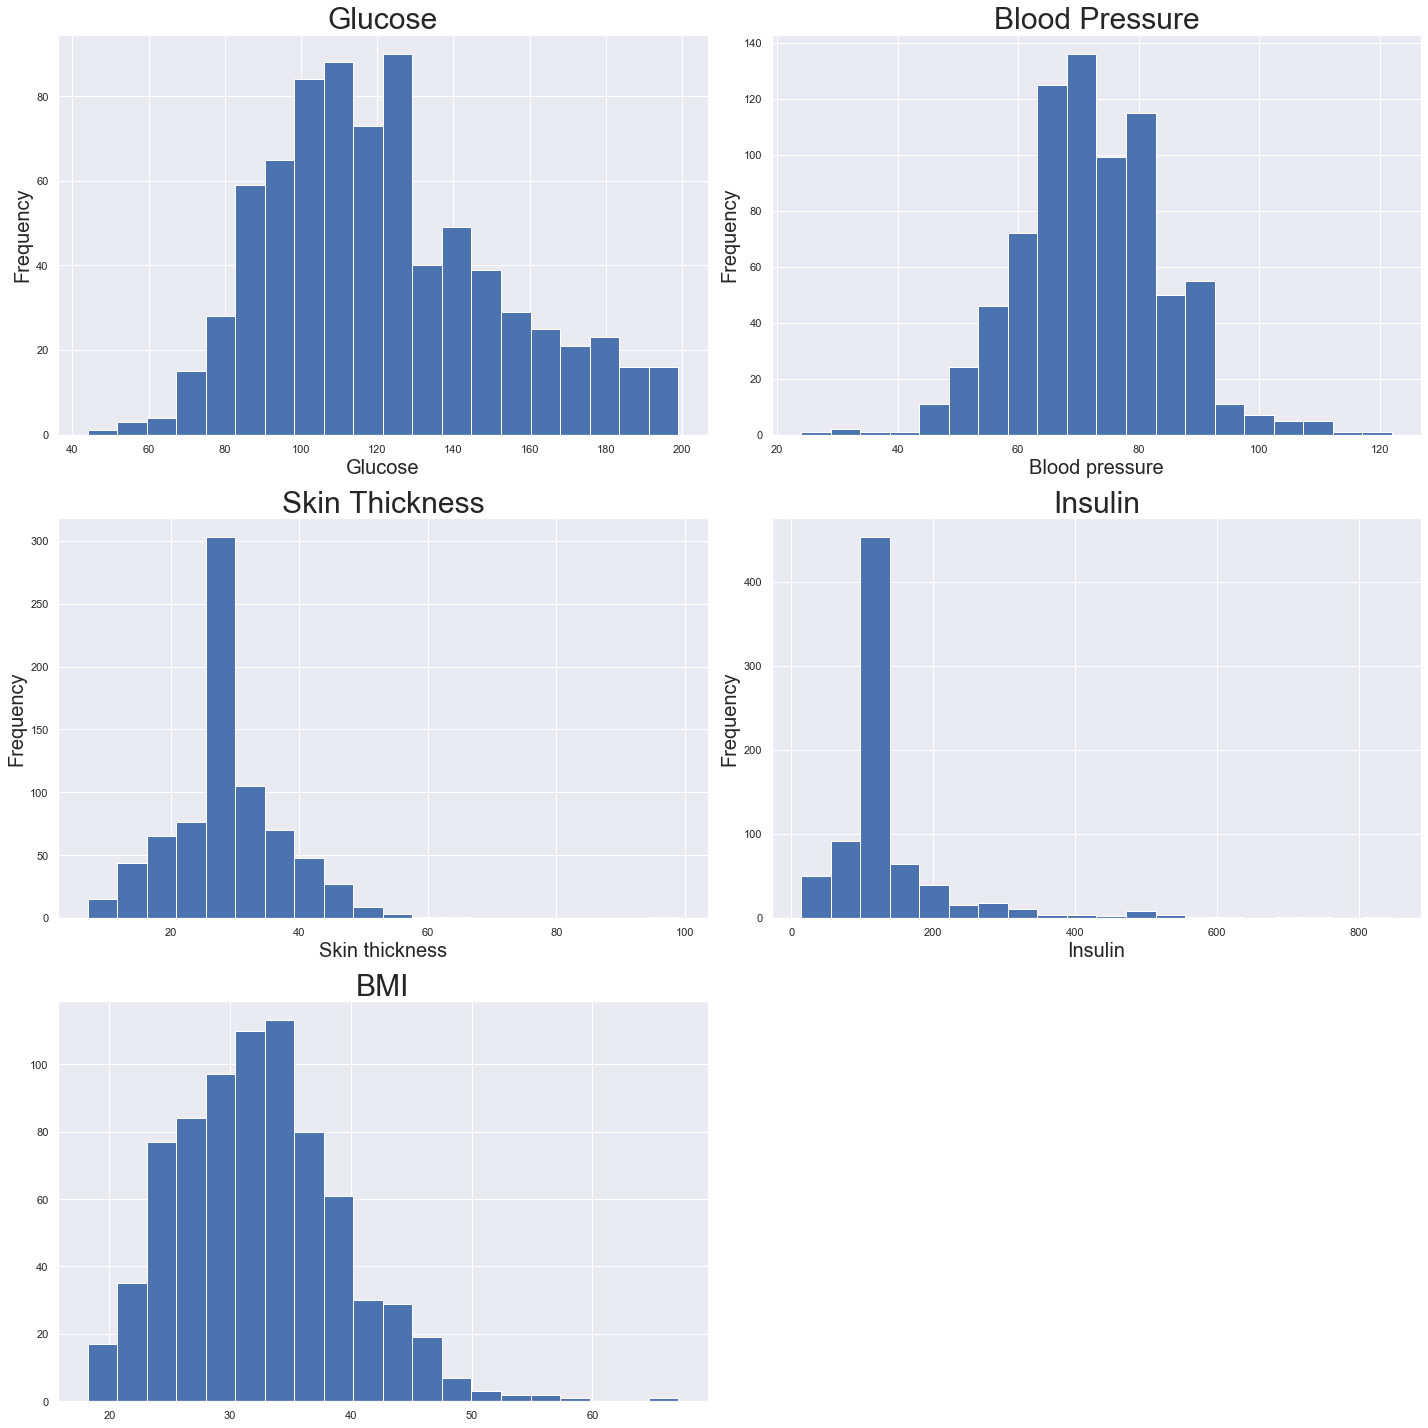

In [143]:
fig, axes = plt.subplots(figsize=(20,20))

_ = plt.subplot(3,2,1)
_ = plt.hist(diabetes_data['Glucose'], bins=20)
_ = plt.title('Glucose', fontdict = {'fontsize' : 30})
_ = plt.xlabel('Glucose', fontdict = {'fontsize' : 20})
_ = plt.ylabel('Frequency', fontdict = {'fontsize' : 20})
_ = plt.tight_layout()

_ = plt.subplot(3,2,2)
_ = plt.hist(diabetes_data['BloodPressure'], bins=20)
_ = plt.title('Blood Pressure', fontdict = {'fontsize' : 30})
_ = plt.xlabel('Blood pressure', fontdict = {'fontsize' : 20})
_ = plt.ylabel('Frequency', fontdict = {'fontsize' : 20})
_ = plt.tight_layout()

_ = plt.subplot(3,2,3)
_ = plt.hist(diabetes_data['SkinThickness'], bins=20)
_ = plt.title('Skin Thickness', fontdict = {'fontsize' : 30})
_ = plt.xlabel('Skin thickness', fontdict = {'fontsize' : 20})
_ = plt.ylabel('Frequency', fontdict = {'fontsize' : 20})
_ = plt.tight_layout()

_ = plt.subplot(3,2,4)
_ = plt.hist(diabetes_data['Insulin'], bins=20)
_ = plt.title('Insulin', fontdict = {'fontsize' : 30})
_ = plt.xlabel('Insulin', fontdict = {'fontsize' : 20})
_ = plt.ylabel('Frequency', fontdict = {'fontsize' : 20})
_ = plt.tight_layout()

_ = plt.subplot(3,2,5)
_ = plt.hist(diabetes_data['BMI'], bins=20)
_ = plt.title('BMI', fontdict = {'fontsize' : 30})
_ = plt.tight_layout()

## 4c. Correlation heatmap

Correlation between various features


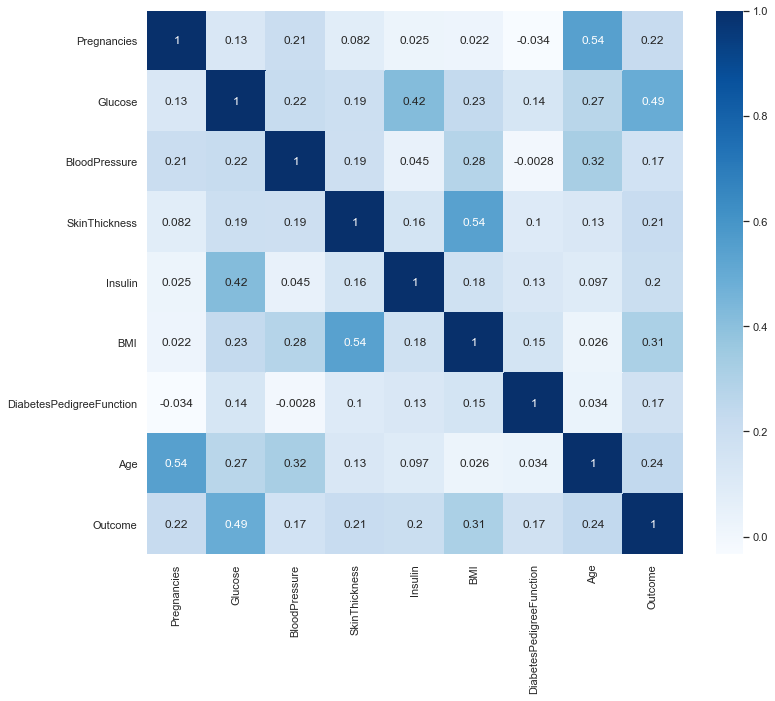

In [144]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

# 5. Modeling

## 5a. Define the `y` variable as the `Outcome` column

In [145]:
X = diabetes_data.loc[:, diabetes_data.columns != 'Outcome']
y = diabetes_data['Outcome']

## 5b. Create a 70/30 train and test split

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 5c. Scale data

In [147]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## 5d. Classify data using KNearestNeighbor classifier

In [148]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [149]:
print(train_scores)
print(test_scores)

[1.0, 0.851024208566108, 0.8547486033519553, 0.8417132216014898, 0.839851024208566, 0.8230912476722533, 0.8342644320297952, 0.8212290502793296, 0.8268156424581006]
[0.6666666666666666, 0.670995670995671, 0.670995670995671, 0.6926406926406926, 0.7012987012987013, 0.683982683982684, 0.7316017316017316, 0.7359307359307359, 0.7316017316017316]


In [150]:
max_train_score = max(train_scores)
max_train_index = train_scores.index(max_train_score)

k = range(1,10)
best_train_k = k[max_train_index]

print('Best k for train set: ' + str(best_train_k))

Best k for train set: 1


In [151]:
max_test_score = max(test_scores)
max_test_index = test_scores.index(max_test_score)

k = range(1,10)
best_test_k = k[max_test_index]

print('Best k for test set: ' + str(best_test_k))

Best k for test set: 8


## 5e. Plot the train and test model performance by number of neighbors.

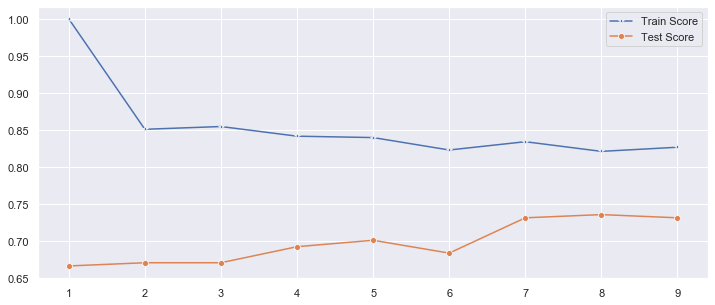

In [152]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')

## 5f. Final plot

In [153]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.683982683982684

In [154]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)
pl

array([[124,  27],
       [ 46,  34]], dtype=int64)

## 5g. Confusion matrix

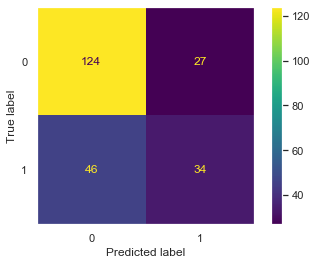

In [155]:
from sklearn.metrics import plot_confusion_matrix

_ = plot_confusion_matrix(knn, X_test, y_test, values_format='')
_ = plt.grid(False)

In [156]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       151
           1       0.56      0.42      0.48        80

    accuracy                           0.68       231
   macro avg       0.64      0.62      0.63       231
weighted avg       0.67      0.68      0.67       231



## 5h. GridSearchCV

In [157]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [158]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':np.arange(1,100)}
rf = RandomForestClassifier()
rf_cv= GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,

In [164]:
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.777361853832442
Best Parameters: {'n_estimators': 41}


# 6. Conclusion

If we were to utilize unsupervised learning on the Pima Indian diabetes dataset, the optimal number for k in a k neighbors algorithm would be 14. For a random forest algorithm, our optimal number of estimators would be 41.